<a href="https://colab.research.google.com/github/MuntahaZaigham1/ds_assign2/blob/master/dsa3q22222.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn.linear_model 
from sklearn.linear_model import LogisticRegression
#from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import random as rn
from sklearn.model_selection import train_test_split
import math

In [0]:
def load_data(path, header):
    marks_df = pd.read_csv(path,delimiter='\t', header=header)
    return marks_df

In [0]:
# load the data from the file
iris_train1 = load_data("/content/IrisPetal.txt", None)

In [4]:
print(iris_train1)
iris_train1.head()

      0    1               2
0   1.4  0.2     Iris-setosa
1   1.4  0.2     Iris-setosa
2   1.3  0.2     Iris-setosa
3   1.5  0.2     Iris-setosa
4   1.4  0.2     Iris-setosa
..  ...  ...             ...
95  5.2  2.3  Iris-virginica
96  5.0  1.9  Iris-virginica
97  5.2  2.0  Iris-virginica
98  5.4  2.3  Iris-virginica
99  5.1  1.8  Iris-virginica

[100 rows x 3 columns]


,0,1,2
0,1.4,0.2,Iris-setosa
1,1.4,0.2,Iris-setosa
2,1.3,0.2,Iris-setosa
3,1.5,0.2,Iris-setosa
4,1.4,0.2,Iris-setosa


In [5]:
# importing the preprocessing module from scikit-learn

from sklearn import preprocessing
LE= preprocessing.LabelEncoder()

# Fitting it to our dataset

iris_train1[2] = LE.fit_transform(iris_train1[2])
iris_train1.head(100)

,0,1,2
0,1.4,0.2,0
1,1.4,0.2,0
2,1.3,0.2,0
3,1.5,0.2,0
4,1.4,0.2,0
...,...,...,...
95,5.2,2.3,1
96,5.0,1.9,1
97,5.2,2.0,1
98,5.4,2.3,1


In [0]:
iris_train, iris_test = train_test_split(iris_train1, test_size=0.33, random_state=42)

In [0]:
# filter out the applicants that true
true = iris_train.loc[iris_train[2] == 1]

# filter out the applicants that are not true
nottrue= iris_train.loc[iris_train[2] == 0]

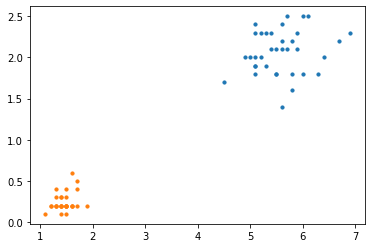

In [10]:
plt.scatter(true.iloc[:, 0], true.iloc[:, 1], s=10, label='true')
plt.scatter(nottrue.iloc[:, 0], nottrue.iloc[:, 1], s=10,label='Not true')

In [0]:
print(iris_train)
print("-------------")
print(iris_test)

In [11]:
# Initializing all the weights as 0
W0_new = 0
W1_new = 0
W2_new = 0
W3_new = 0
W4_new = 0

# Alpha
a = 0.02

# MSE
MSE = np.array([])

#sigmoid function 
def sigmoid(output):
    z = 1/(1+math.exp(-output)) 
    return z

for epoch in range(len(iris_train)):
    
    p_preds = np.array([])
    p_pred_exps = np.array([])
    error = np.array([])
    error_x1 = np.array([])
    error_x2 = np.array([])
    p_class = np.array([])
    
    # Assigning all the weights their new values after an epoch:
    W0 = W0_new
    W1 = W1_new
    W2 = W2_new
    W3 = W3_new
    W4 = W4_new
    
    # Iterating through the Df and calculating all parameters:
    for row in iris_train.itertuples():
        
        #The predicted value:
        p_pred = W0 + W1*row[0]+ W2*row[1]
        p_preds = np.append(p_preds, p_pred)
        
        # Predicted value after applying the sigmoid function
        p_pred_exp = sigmoid(p_pred)
        p_pred_exps = np.append(p_pred_exps, p_pred_exp)   
        
        # Bifurcating the predicted class as per its probability to be the default class
    
        if p_pred_exp > 0.5:
            p_class = np.append(p_class,1)
        else:
            p_class = np.append(p_class,0)
     
    # The error in prediction
    error = p_pred_exps - iris_train[2]
    # Pre-calculating the error*x values for all the weights:
    error_x1 = error*iris_train[0]
    error_x2 = error*iris_train[1]
    
    
    # Calculating MSE
    MSE_val = (error).mean()
    MSE = np.append(MSE,MSE_val)
    
    # Updating the weights
    W0_new = W0 - a*np.sum(error)
    W1_new = W1 - a*np.sum(error_x1)
    W2_new = W2 - a*np.sum(error_x2)
    

# Adding the predicted class as a separate column to check for performance:
iris_train['pred_class']=p_class

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


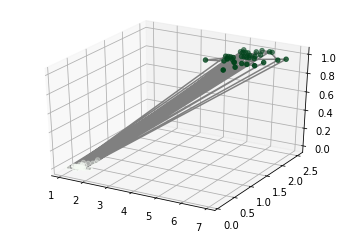

In [23]:
ax = plt.axes(projection='3d')

# Data for a three-dimensional line
zline = p_pred_exps
xline = iris_train[0]
yline = iris_train[1]
ax.plot3D(xline, yline, zline, 'gray')

# Data for three-dimensional scattered points
zdata = p_pred_exps
xdata = iris_train[0]
ydata = iris_train[1]
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Greens');

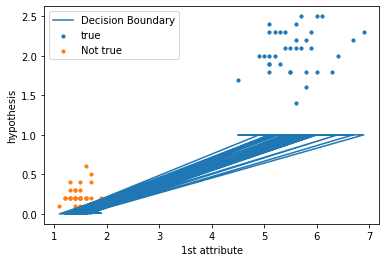

In [29]:
plt.scatter(true.iloc[:, 0], true.iloc[:, 1], s=10, label='true')
plt.scatter(nottrue.iloc[:, 0], nottrue.iloc[:, 1], s=10,label='Not true')
plt.plot(iris_train[0],p_pred_exps, label='Decision Boundary')
plt.xlabel('1st attribute')
plt.ylabel('hypothesis')
plt.legend()
plt.show()

In [10]:
print(iris_train)

      0    1  2  pred_class
28  1.4  0.2  0         0.0
93  5.9  2.3  1         1.0
5   1.7  0.4  0         0.0
66  5.5  1.8  1         1.0
65  5.3  2.3  1         1.0
..  ...  ... ..         ...
60  5.1  2.0  1         1.0
71  4.9  2.0  1         1.0
14  1.2  0.2  0         0.0
92  5.1  1.9  1         1.0
51  5.1  1.9  1         1.0

[67 rows x 4 columns]


In [11]:
# Checking how many mis-classifications did our model come out with

iris_train.pred_class.astype('int64')
iris_train[iris_train.pred_class != iris_train[2]]

# Checking the final weights 
print(W0_new,W1_new,W2_new,W3_new,W4_new)

-12.207017163157241 -0.07436424108314209 4.905172598610876 0 0


In [12]:

# True Positives:
print('TP: ',iris_train[2][(iris_train[2]==1) & (iris_train.pred_class==1)].count())
# False Positives:
print('FP: ',iris_train[2][(iris_train[2]==0) & (iris_train.pred_class==1)].count())
#True Negatives:
print('TN: ',iris_train[2][(iris_train[2]==0) & (iris_train.pred_class==0)].count())
#False Negatives:
print('FN: ',iris_train[2][(iris_train[2]==1) & (iris_train.pred_class==0)].count())

TP:  36
FP:  0
TN:  31
FN:  0


In [13]:
print(iris_test.shape)
print(iris_test.itertuples())


(33, 3)


In [0]:
p_class_test = np.array([])
for row in iris_test.itertuples():
    
    p_pred = W0_new + W1_new*row[0]+ W2_new*row[1] 
    p_pred_exp = sigmoid(p_pred)   #predicted value
        
    if p_pred_exp > 0.5:
        p_class_test = np.append(p_class_test,1)
    else:
        p_class_test = np.append(p_class_test,0)

In [18]:
# Adding the predicted class column
iris_test['Pred_class'] = p_class_test

#Building the Confusion Matrix:
iris_test.Pred_class.astype('int64')
print('TP: ',iris_test[2][(iris_test[2]==1) & (iris_test.Pred_class==1)].count())
tp=iris_test[2][(iris_test[2]==1) & (iris_test.Pred_class==1)].count()
print('FP: ',iris_test[2][(iris_test[2]==0) & (iris_test.Pred_class==1)].count())
fp=iris_test[2][(iris_test[2]==0) & (iris_test.Pred_class==1)].count()
print('TN: ',iris_test[2][(iris_test[2]==0) & (iris_test.Pred_class==0)].count())
tn=iris_test[2][(iris_test[2]==0) & (iris_test.Pred_class==0)].count()
print('FN: ',iris_test[2][(iris_test[2]==1) & (iris_test.Pred_class==0)].count())
fn=iris_test[2][(iris_test[2]==1) & (iris_test.Pred_class==0)].count()

TP:  14
FP:  0
TN:  19
FN:  0


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [21]:
accuracy=(tp + tn) / (tp + tn + fn + fp)

print('Accuracy: %f' % accuracy)
precision= tp / (tp + fp)

print('Precision: %f' % precision)
recall= tp / (tp + fn)

print('Recall: %f' % recall)
f1= 2*tp / (2 *tp + fp + fn)

print('f1-score: %f' % f1)

Accuracy: 1.000000
Precision: 1.000000
Recall: 1.000000
f1-score: 1.000000
